In [344]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [349]:
NotCheating = pd.read_csv('NotCheatingNewMethod.csv')

Cheating = pd.read_csv('CheatingNewMethod.csv')

In [350]:
Cheating = Cheating.groupby(np.arange(len(Cheating)) // 10).mean()

NotCheating = NotCheating.groupby(np.arange(len(NotCheating)) // 10).mean()

In [351]:
NotCheating.reset_index(drop = False, inplace = True)

Cheating.reset_index(drop = False, inplace = True)

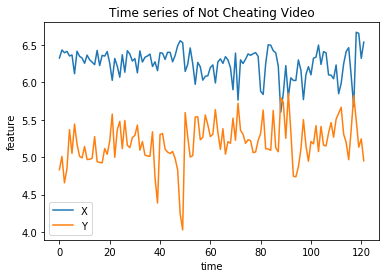

In [378]:
plt.plot(NotCheating.index, np.log(NotCheating.X))

plt.plot(NotCheating.index, np.log(NotCheating.Y))

plt.title('Time series of Not Cheating Video')

plt.xlabel('time')

plt.ylabel('feature')

plt.legend(['X', 'Y'])

plt.savefig('Time_series_of_Not_Cheating_Video.png')

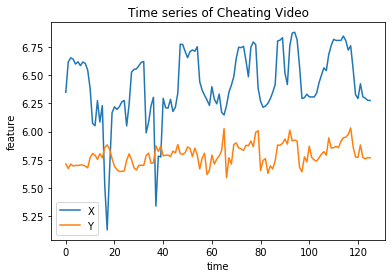

In [379]:
plt.plot(Cheating.index, np.log(Cheating.X))

plt.plot(Cheating.index, np.log(Cheating.Y))

plt.title('Time series of Cheating Video')

plt.xlabel('time')

plt.ylabel('feature')

plt.legend(['X', 'Y'])

plt.savefig('Time_series_of_Cheating_Video.png')

In [354]:
NotCheating.describe()

index           X           Y      Width     Height
count  122.000000  122.000000  122.000000  122.00000  122.00000
mean    60.500000  527.726230  188.184426   54.02623   54.02623
std     35.362409   95.438158   52.390331    6.82007    6.82007
min      0.000000  270.900000   56.200000   36.40000   36.40000
25%     30.250000  468.075000  154.525000   49.50000   49.50000
50%     60.500000  540.350000  179.600000   53.45000   53.45000
75%     90.750000  591.125000  213.750000   58.40000   58.40000
max    121.000000  788.100000  349.100000   72.50000   72.50000

In [355]:
Cheating.describe()

index           X           Y       Width      Height
count  126.000000  126.000000  126.000000  126.000000  126.000000
mean    62.500000  639.382143  329.831944   55.034722   55.034722
std     36.517119  173.362492   31.705114    8.102004    8.102004
min      0.000000  168.900000  268.100000   36.900000   36.900000
25%     31.250000  524.800000  303.275000   49.825000   49.825000
50%     62.500000  595.250000  326.600000   54.550000   54.550000
75%     93.750000  773.525000  352.325000   60.075000   60.075000
max    125.000000  971.400000  416.600000   75.500000   75.500000

In [356]:
NotCheating['Label'] = 0

Cheating['Label'] = 1

In [357]:
FullTrainSet = pd.concat([NotCheating, Cheating], axis = 0)

FullTrainSet.reset_index(drop = True, inplace = True)

FullTrainSet = FullTrainSet.drop(['index'], axis = 1)

In [358]:
FullTrainSet

X        Y   Width  Height  Label
0    558.50  125.600  59.200  59.200      0
1    621.70  150.000  61.600  61.600      0
2    599.40  105.400  65.700  65.700      0
3    610.70  127.300  71.500  71.500      0
4    574.10  214.500  62.800  62.800      0
..      ...      ...     ...     ...    ...
243  616.00  358.300  53.400  53.400      1
244  548.60  320.700  55.600  55.600      1
245  542.10  316.900  58.300  58.300      1
246  531.80  320.300  58.300  58.300      1
247  530.75  319.625  55.375  55.375      1

[248 rows x 5 columns]

In [359]:
Label = FullTrainSet.Label

FullTrainSet = FullTrainSet.drop(['Label'], axis = 1)

In [360]:
from sklearn.model_selection import StratifiedKFold

KFold = StratifiedKFold(n_splits = 5, random_state = 666, shuffle = True)

TrainIndices = []

TestIndices = []

for TrainIndex, TestIndex in KFold.split(FullTrainSet, Label):
    
    TrainIndices.append(TrainIndex)
    
    TestIndices.append(TestIndex)

TrainIndices = np.array(TrainIndices)

TestIndices = np.array(TestIndices)

In [361]:
ListOfColumns = FullTrainSet.columns

def Normalize(DataSet):

    for i in ListOfColumns:
    
        DataSet[i] = (DataSet[i] - min(DataSet[i])) / (max(DataSet[i]) - min(DataSet[i]))
    
    return DataSet

NormalizedFullTrainSet = Normalize(FullTrainSet)

NormalizedFullTrainSet

X         Y     Width    Height
0    0.485483  0.192564  0.583120  0.583120
1    0.564237  0.260266  0.644501  0.644501
2    0.536449  0.136515  0.749361  0.749361
3    0.550530  0.197281  0.897698  0.897698
4    0.504922  0.439234  0.675192  0.675192
..        ...       ...       ...       ...
243  0.557134  0.838235  0.434783  0.434783
244  0.473146  0.733907  0.491049  0.491049
245  0.465047  0.723363  0.560102  0.560102
246  0.452212  0.732797  0.560102  0.560102
247  0.450903  0.730924  0.485294  0.485294

[248 rows x 4 columns]

In [362]:
Label.value_counts(normalize = True)

1    0.508065
0    0.491935
Name: Label, dtype: float64

In [427]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, classification_report


def TrainModel(): #Classifier
    
    #if Classifier == 'Tree-Based':
        
    Model = ExtraTreesClassifier(n_estimators = 100, max_depth = 4, n_jobs = -1, random_state = 666)
        
#     elif Classifier == 'Linear':
        
        
    FullTrainSet = NormalizedFullTrainSet
          
    Metrics = []
        
    Fold = 0

    for TrainIdx, TestIdx in zip(TrainIndices, TestIndices):
        
        Fold += 1
        
        print("Fold:", Fold)
        
        Model.fit(FullTrainSet.iloc[TrainIdx, :], Label.iloc[TrainIdx])
        
        print(Fold, 'Fitted')
        
        YPredicted = Model.predict_proba(FullTrainSet.iloc[TestIdx, :])[:, 1]

        YTrue = Label.iloc[TestIdx]
        
        Metrics.append(log_loss(YTrue, YPredicted))
        
        print("Loss by fold:", Fold, '=', Metrics[-1])
    
    print('Mean Loss:', np.mean(Metrics))
    
    sns.distplot(YPredicted)
    
    sns.distplot(YTrue)
    
    plt.legend(['Y Pred', 'Y True'])
    
    plt.title('Differential and Integral Distributions of pred')
    
    plt.savefig('Distribution.png')
    
    return Model

Fold: 1
1 Fitted
Loss by fold: 1 = 0.2765838680910722
Fold: 2
2 Fitted
Loss by fold: 2 = 0.2673366344989457
Fold: 3
3 Fitted
Loss by fold: 3 = 0.25838870947073783
Fold: 4
4 Fitted
Loss by fold: 4 = 0.2674438560319404
Fold: 5
5 Fitted
Loss by fold: 5 = 0.23482809423442141
Mean Loss: 0.2609162324654235


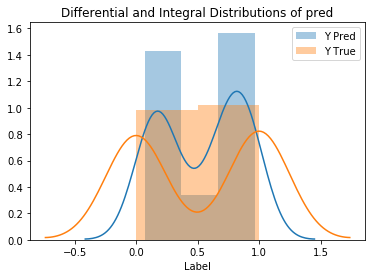

In [428]:
Model = TrainModel()

In [429]:
from sklearn.ensemble import ExtraTreesClassifier

Model = ExtraTreesClassifier(n_estimators = 100, max_depth = 4, n_jobs = -1, random_state = 666)

Model.fit(FullTrainSet, Label)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=4, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=666, verbose=0,
                     warm_start=False)

In [430]:
NotCheatingNewMethodTest = pd.read_csv('NotCheatingNewMethodTest.csv')

NotCheatingNewMethodTest = NotCheatingNewMethodTest.groupby(np.arange(len(NotCheatingNewMethodTest)) // 10).mean()

YPred = Model.predict_proba(NotCheatingNewMethodTest)[:,0]

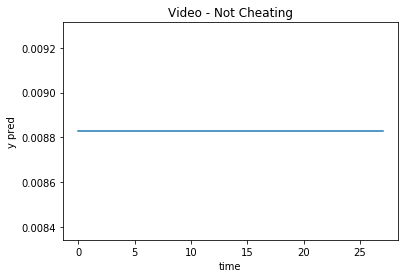

In [434]:
plt.plot(NotCheatingNewMethodTest.index, YPred)

plt.title('Video - Not Cheating')

plt.xlabel('time')

plt.ylabel('y pred')

plt.savefig('TestNotCheating.png')

In [437]:
CheatingNewMethodTest = pd.read_csv('CheatingNewMethodTest.csv')

CheatingNewMethodTest = CheatingNewMethodTest.groupby(np.arange(len(CheatingNewMethodTest)) // 10).mean()

YPred = Model.predict_proba(CheatingNewMethodTest)[:,0]

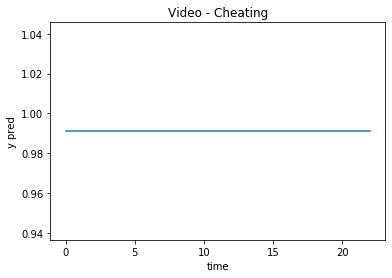

In [439]:
plt.plot(CheatingNewMethodTest.index, YPred)

plt.title('Video - Cheating')

plt.xlabel('time')

plt.ylabel('y pred')

plt.savefig('TestCheating.png')